<h1><b>Amazon_Movies Exploratory Data Analysis </b></h1>

<h2><b>Created by : Mehreen kanwal</b></h2>

In [1]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Atiq\Downloads\amazon csv file\Amazon- Movies and Films.csv',encoding='unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2108 non-null   int64  
 1   title          2108 non-null   object 
 2   Movie_Rating   2108 non-null   float64
 3   No_of_Ratings  2108 non-null   int64  
 4   Format         2108 non-null   object 
 5   ReleaseYear    2069 non-null   float64
 6   MPAA_Rating    1378 non-null   object 
 7   Directed_By    2043 non-null   object 
 8   Starring       2107 non-null   object 
 9   Price          1011 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 164.8+ KB


In [4]:
df.head(10)

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price
0,0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN
1,1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99
2,2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra MÃ¡rquez Abella,"Michael PeÃ±a,Rosa Salazar",NaN
3,3,Kelce,5.0,570,Prime Video,2023.0,NaN,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",NaN
4,4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",NaN
5,5,Those Who Wish Me Dead,4.3,7403,Prime Video,2021.0,R,Taylor Sheridan,"Angelina Jolie,Nicholas Hoult,Jon Bernthal",3.79
6,6,Renfield,4.1,9259,Prime Video,2023.0,R,Chris McKay,"Nicholas Hoult,Nicolas Cage,Awkwafina",5.99
7,7,The Proposal,4.8,52086,Prime Video,2009.0,PG-13,Anne Fletcher,"Betty White,Sandra Bullock,Ryan Reynolds",NaN
8,8,Black Adam,4.2,22762,Prime Video,2022.0,PG-13,Jaume Collet-Serra,"Dwayne Johnson,Aldis Hodge,Pierce Brosnan",3.79
9,9,A Thousand and One,4.5,1317,Prime Video,2023.0,R,A.V. Rockwell,"Teyana Taylor,Will Catlett,Josiah Cross,Aven C...",5.89


In [5]:
pd.isnull(df).sum()

Unnamed: 0          0
title               0
Movie_Rating        0
No_of_Ratings       0
Format              0
ReleaseYear        39
MPAA_Rating       730
Directed_By        65
Starring            1
Price            1097
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['ReleaseYear'] = df['ReleaseYear'].astype('int')

In [8]:
df['ReleaseYear'].dtype

dtype('int32')

In [9]:
df.columns

Index(['Unnamed: 0', 'title', 'Movie_Rating', 'No_of_Ratings', 'Format',
       'ReleaseYear', 'MPAA_Rating', 'Directed_By', 'Starring', 'Price'],
      dtype='object')

In [10]:
df.rename(columns = {'ReleaseYear':'Release_year','Unnamed: 0':'Serial_nmbr'},inplace=True)

In [11]:
df.describe()

,Serial_nmbr,Movie_Rating,No_of_Ratings,Release_year,Price
count,740.000000,740.000000,740.000000,740.000000,740.000000
mean,910.906757,4.548378,14227.771622,2008.308108,4.346635
std,613.220925,0.219940,20868.953637,13.129507,2.631873
min,1.000000,4.000000,8.000000,1948.000000,0.990000
25%,377.750000,4.400000,2335.500000,2002.000000,3.790000
50%,845.500000,4.600000,6497.000000,2011.000000,3.790000
75%,1389.250000,4.700000,16423.750000,2018.000000,3.990000
max,2116.000000,4.900000,142807.000000,2023.000000,24.990000


In [12]:
df[['No_of_Ratings','Movie_Rating','Price']].describe()

,No_of_Ratings,Movie_Rating,Price
count,740.000000,740.000000,740.000000
mean,14227.771622,4.548378,4.346635
std,20868.953637,0.219940,2.631873
min,8.000000,4.000000,0.990000
25%,2335.500000,4.400000,3.790000
50%,6497.000000,4.600000,3.790000
75%,16423.750000,4.700000,3.990000
max,142807.000000,4.900000,24.990000


<h1><b>Exploratory Data Analysis </b></h1>

<h2><b>Top 5 movies based on 'No_of_Ratings'</b></h2>

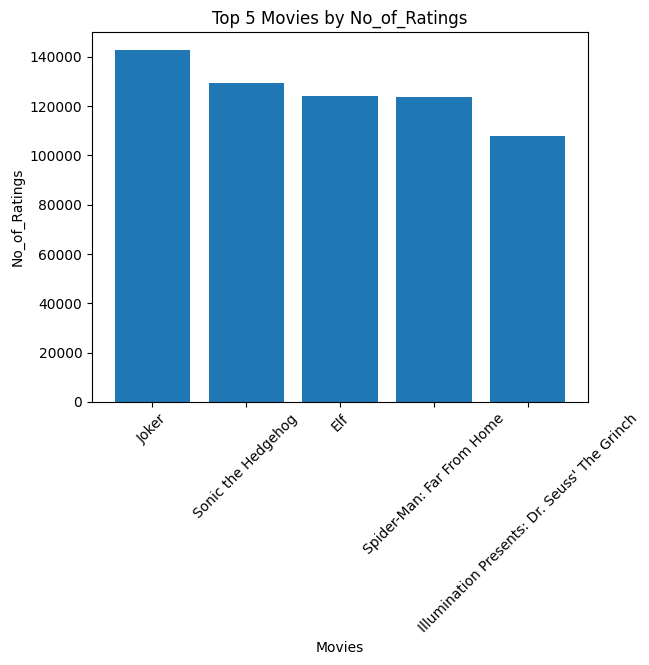

In [13]:
top_movies = df.nlargest(5, 'No_of_Ratings')
plt.xlabel('Movies')
plt.ylabel('No_of_Ratings')
plt.title('Top 5 Movies by No_of_Ratings')
plt.bar(top_movies['title'], top_movies['No_of_Ratings'])
plt.xticks(rotation=45)
plt.show()

<h2><b>Distribution of 'Movie_Rating'</b></h2>

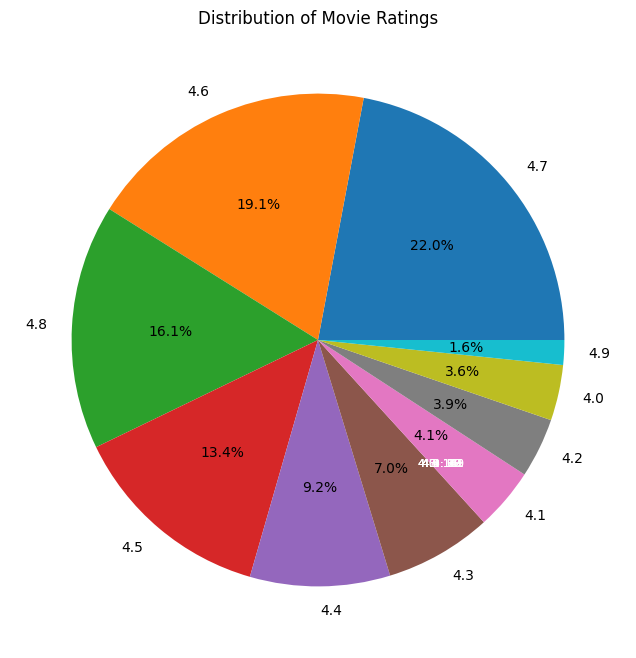

In [39]:
rating_distribution = df['Movie_Rating'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%')

# Annotate with frequency values
for i, count in enumerate(rating_distribution):
    plt.text(
        x=0.5, 
        y=-0.5, 
        s=f'{rating_distribution.index[i]}: {count}', 
        ha='center', 
        va='center', 
        fontsize=8,
        color='white'
    )

plt.title('Distribution of Movie Ratings')
plt.show()

<h2><b>Impact of ReleaseYear on No_of_Ratings </b></h2>

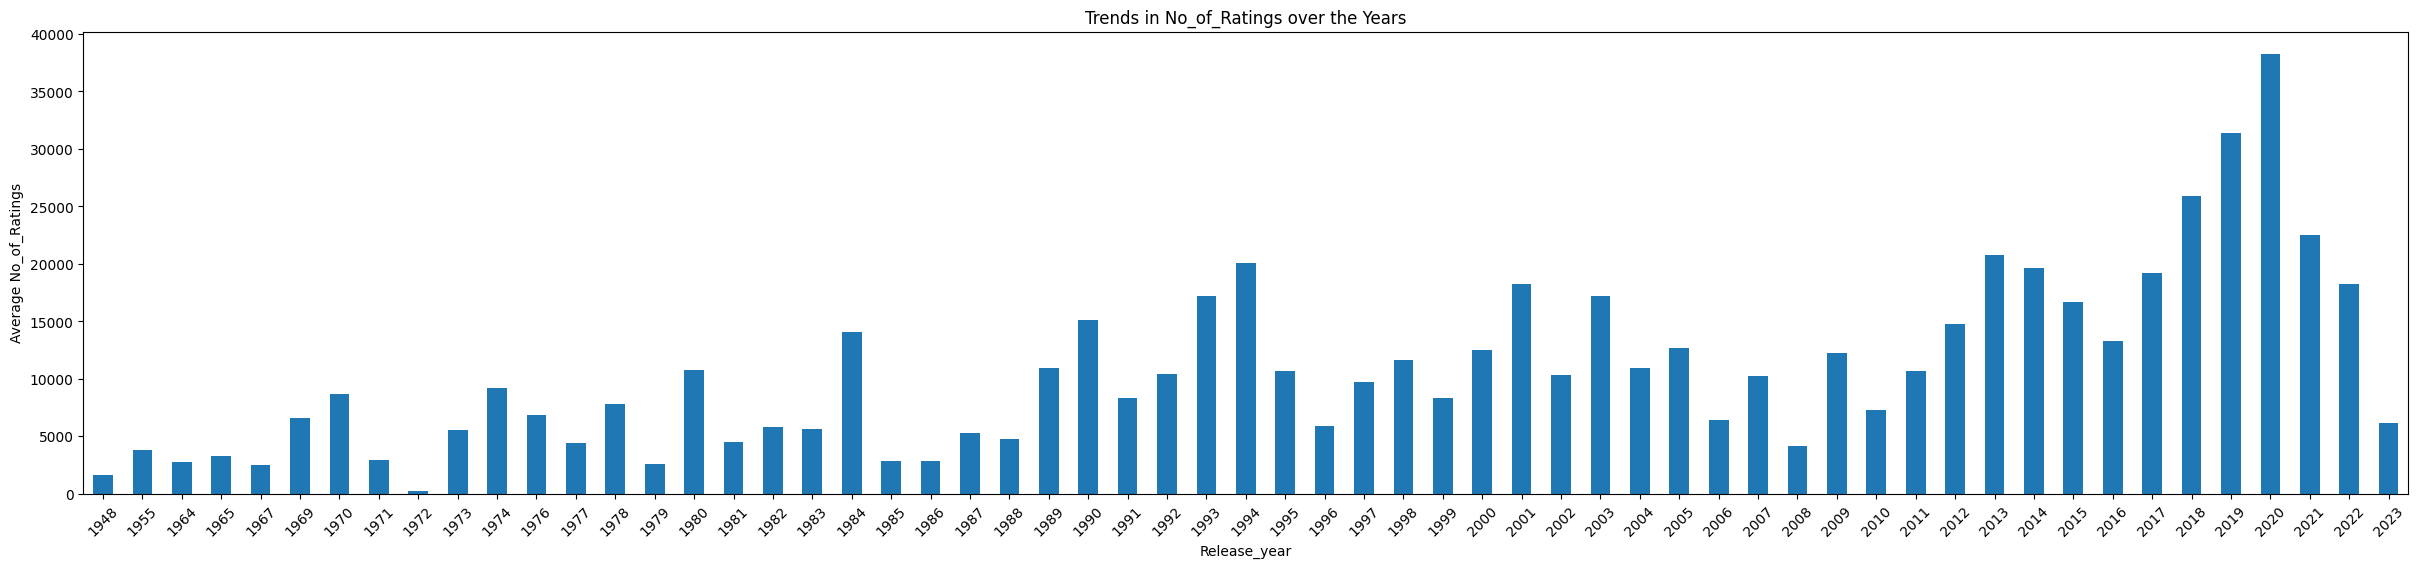

In [30]:
ratings_per_year = df.groupby('Release_year')['No_of_Ratings'].mean()

# Plotting the trend of 'No_of_Ratings' over the years 
plt.figure(figsize=(30, 6))  # Adjust the figure size as needed
ratings_per_year.plot(kind='bar')
plt.title('Trends in No_of_Ratings over the Years')
plt.xlabel('Release_year')
plt.ylabel('Average No_of_Ratings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<h2><b>Count of unique movies for each MPAA_Rating </b></h2>

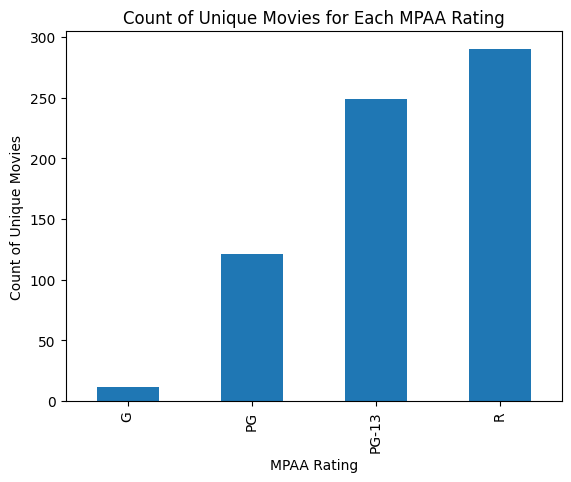

In [37]:
unique_movies_per_rating = df.groupby('MPAA_Rating')['title'].nunique()
unique_movies_per_rating.plot(kind='bar')
plt.xlabel('MPAA Rating')
plt.ylabel('Count of Unique Movies')
plt.title('Count of Unique Movies for Each MPAA Rating')
plt.show()

<h2><b>Conclusion: </b></h2>

Top 5 Movies: The top five movies based on rating are 'Joker', 'Sonic the Hedgehog', 'Elf', 'Spiderman: Far From Home', and 'Illumination Presents.'
    
Rating Distribution: Around 22% of the total movies obtained a rating of 4.7, while only 1.6% received a rating of 4.9.


Impact of Release Year: Movies released between 2018 and 2020 received the highest ratings, indicating a positive correlation between recent releases and higher ratings.


MPAA Rating Distribution: More than 280 unique movies received an 'R' MPAA rating, showcasing a substantial count of movies in this category.


Therefore, the key takeaways from the data analysis are the identification of top-rated movies, insights into rating distribution percentages, the impact of release year on ratings, and the significant count of movies falling under the 'R' MPAA rating category.  